# Data Preservation Task 3

This experiment takes a dataset about divorces per year after marrige (link: https://www.data.gv.at/katalog/dataset/7fa00c8b-6189-42b8-af93-cc1ebff0a818) and plots the number of divorces per year from 1985 to 2014, for marriges that held between ten and eleven years.
The experiment consists of three steps:

* Connect to mongodb
* Fetch and transform data
* Plot results

## Imports:

In [1]:
import pymongo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import re
from pymongo import MongoClient
%matplotlib inline

## 1. Connect to mongoDB

Establish a connection to the local mongoDB Docker container

In [2]:
client = MongoClient('mongodb')
db = client.dp
collection = db.divorce

## 2. Fetch & Transform

Perform the following steps for the transformation:
  * For each entry, gather the number of divorces from the unnecessarily nested `values` object
  * The `DURATION` field contains a string of the form "**x** to under **y** years". Parse the first value **x**
  * Delete all other attributes of an entry, except **REF_YEAR**

In [3]:
data = db.divorce.find()[0]['data']
for entry in data:
    entry['DIVORCES'] = entry['values'][0]['NUMBER']
    s = entry['DURATION']
    tmp = re.findall(r'\d+', s)
    if (len(tmp) == 1):
        tmp[0] = 0
    del entry['values']
    del entry['NUTS1']
    del entry['NUTS2']
    entry['DURATION'] = tmp[0]

Transform to JSON for pandas import:

In [4]:
data_json = json.dumps(data)

## Plot

Parse JSON into a pandas `DataFrame` object and plot as bar chart

In [5]:
df = pd.read_json(data_json)
filtered = df[df.DURATION == 10].filter(items=['DIVORCES','REF_YEAR'])
filtered

,DIVORCES,REF_YEAR
10,138,1985
25,125,1986
40,129,1987
55,130,1988
70,132,1989
85,108,1990
100,117,1991
115,121,1992
130,139,1993
145,138,1994


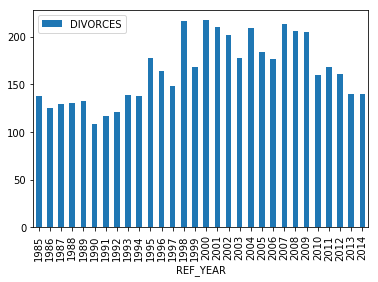

In [6]:
filtered.plot.bar(x='REF_YEAR',y='DIVORCES')

This figure depicts the number of divorces per year between 1985 and 2014, for all marriges that held more than ten, but less than eleven years.